In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Regression

#### Load data

In [2]:
data = np.loadtxt("Data/data_w3_ex1.csv", delimiter=",")
print(data[:5])

[[1651.          432.64521724]
 [1691.81632653  454.93552962]
 [1732.63265306  471.52524758]
 [1773.44897959  482.50638875]
 [1814.26530612  468.35788634]]


#### Split the inputs and outputs

In [3]:
x = data[:,0]
y = data[:,1]

print(x.shape, y.shape)

(50,) (50,)


#### Convert 1-D arrays into 2-D

In [4]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"The shape of the inputs x is: {x.shape}")
print(f"The shape of the outputs y is: {y.shape}")

The shape of the inputs x is: (50, 1)
The shape of the outputs y is: (50, 1)


#### Data visualization

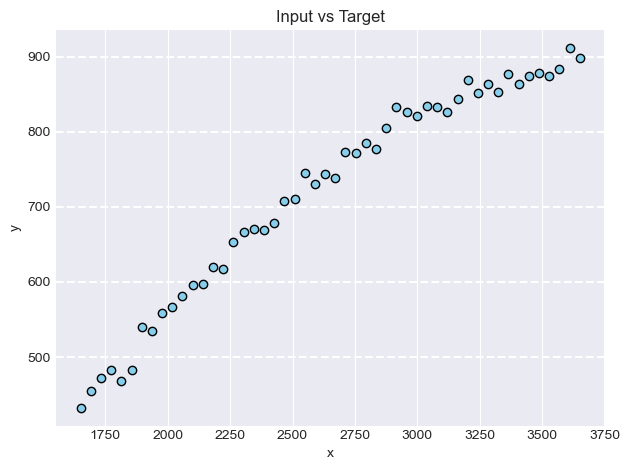

In [5]:
plt.style.use("seaborn-v0_8-darkgrid")

plt.scatter(x, y, color="skyblue", marker="o", edgecolors="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Input vs Target")
plt.grid(True, axis="y", linestyle="--", linewidth=1.5)
plt.tight_layout()
plt.show()

#### Split the dataset into training, cross validation, and test sets

In [6]:
X_train, X_, y_train, y_ = train_test_split(x, y, test_size=0.4, random_state=1)

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)

del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


#### Data visualization

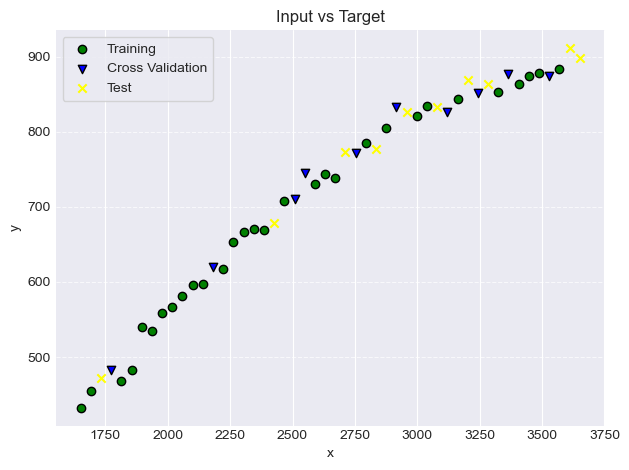

In [7]:
plt.scatter(X_train, y_train, color="green", marker="o", edgecolors="black", label="Training")
plt.scatter(X_cv, y_cv, color="blue", marker="v", edgecolors="black", label="Cross Validation")
plt.scatter(X_test, y_test, color="yellow", marker="x", label="Test")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input vs Target")
plt.legend(frameon=True)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

#### Fit a linear model

##### Feature Scaling
We use the z-score to scale data, it is given by the equation:
$$
z = \frac{x - \mu}{\sigma}
$$

In [8]:
scaler_linear = StandardScaler()

X_train_scaled = scaler_linear.fit_transform(X_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


##### Data visualization after feature scaling

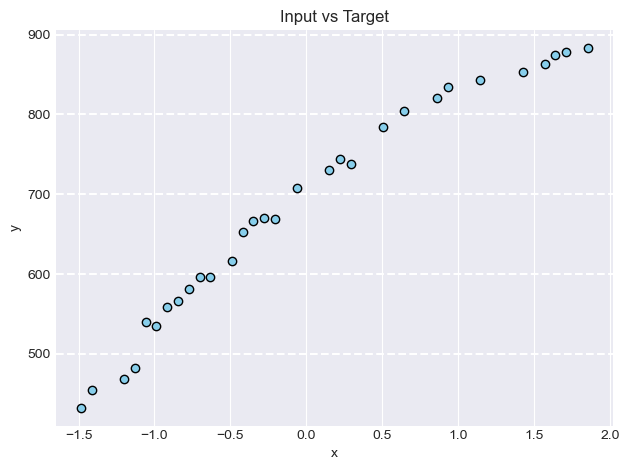

In [9]:
plt.scatter(X_train_scaled, y_train, color="skyblue", marker="o", edgecolors="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Input vs Target")
plt.grid(True, axis="y", linestyle="--", linewidth=1.5)
plt.tight_layout()
plt.show()

##### Train the model

In [10]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Evaluate model

In [11]:
yhat = linear_model.predict(X_train_scaled)

print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

total_square_error = np.sum((yhat - y_train)**2)

mse = total_square_error / (2 * len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 406.19374192533127
training MSE (for-loop implementation): 406.19374192533127


##### Cost loss in validation set

In [12]:
X_cv_scaled = scaler_linear.transform(X_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

yhat = linear_model.predict(X_cv_scaled)

print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


#### Adding Polynomial Features

##### Create the additional features

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_mapped = poly.fit_transform(X_train)

print(X_train_mapped[:5])

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]]


##### Feature scaling

In [14]:
scaler_poly = StandardScaler()

X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

print(f"Mean used to scale the training set: {scaler_poly.mean_.squeeze()}")
print(f"Standard deviation used to scale the training set: {scaler_poly.scale_.squeeze()}")

print(X_train_mapped_scaled[:5])

Mean used to scale the training set: [2.50406122e+03 6.60077937e+06]
Standard deviation used to scale the training set: [5.74853681e+02 3.02323580e+06]
[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]


##### Train the model

In [15]:
model = LinearRegression()

model.fit(X_train_mapped_scaled, y_train)

yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(X_cv)

X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025175
Cross validation MSE: 87.69841211111921


#### Model selection

In [16]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1, 11):
    # Add polynomial features to the training data
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)

    # Scale the training set
    scaler = StandardScaler()
    X_train_mapped_scale = scaler.fit_transform(X_train_mapped)
    scalers.append(scaler)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scale, y_train)
    models.append(model)

    # Computing the training MSE
    yhat = model.predict(X_train_mapped_scale)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(X_cv)
    X_cv_mapped_scaled = scaler.transform(X_cv_mapped)

    # Computing the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

##### Visualization

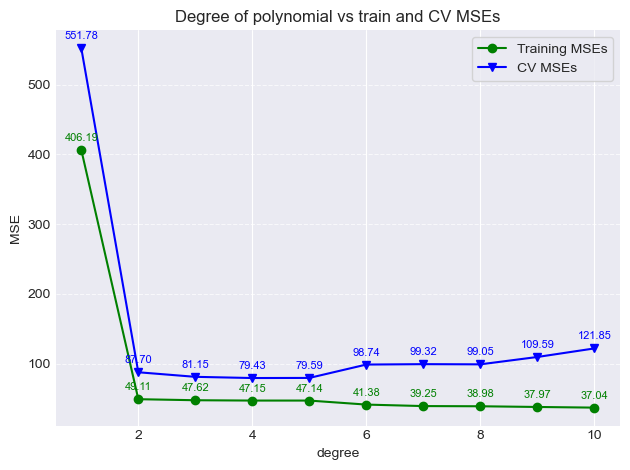

In [17]:
degrees = range(1, 11)

plt.plot(degrees, train_mses, color="green", marker="o", label="Training MSEs")
plt.plot(degrees, cv_mses, color="blue", marker="v", label="CV MSEs")

for x, y in zip(degrees, train_mses):
    plt.text(x, y+10, f"{y:.2f}", ha="center", va="bottom", fontsize=8, color="green")

for x, y in zip(degrees, cv_mses):
    plt.text(x, y+10, f"{y:.2f}", ha="center", va="bottom", fontsize=8, color="blue")
plt.xlabel("degree")
plt.ylabel("MSE")
plt.title("Degree of polynomial vs train and CV MSEs")
plt.legend(loc="best", frameon=True)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

##### Choosing the best model

In [18]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [19]:
X_test_mapped = polys[degree - 1].transform(X_test)

X_test_mapped_scaled = scalers[degree - 1].transform(X_test_mapped)

yhat = models[degree - 1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


### Neural Networks
<img src="Images/neural_network_architectures.png" width=600>

#### Prepare the Data

In [20]:
degree = 1
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_mapped = poly.fit_transform(X_train)
X_cv_mapped = poly.transform(X_cv)
X_test_mapped = poly.transform(X_test)

#### Scale the features using the z-score

In [21]:
scaler = StandardScaler()
X_train_mapped_scale = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scale = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

#### Build and train models

In [22]:
def build_models():
    tf.random.set_seed(20)
    
    model_1 = Sequential([
        Dense(units=25, activation="relu"),
        Dense(units=15, activation="relu"),
        Dense(units=1, activation="linear")
    ], name="Model_1")

    model_2 = Sequential([
        Dense(units=20, activation="relu"),
        Dense(units=12, activation="relu"),
        Dense(units=12, activation="relu"),
        Dense(units=20, activation="relu"),
        Dense(units=1, activation="linear")
    ], name="Model_2")

    model_3 = Sequential([
        Dense(units=32, activation="relu"),
        Dense(units=16, activation="relu"),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=12, activation="relu"),
        Dense(units=1, activation="linear")
    ], name="Model_3")

    model_list = [model_1, model_2, model_3]
    return model_list


In [23]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

nn_models = build_models()
for model in nn_models:
    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
    )

    print(f"Training {model.name}...")

    model.fit(
        X_train_mapped_scale, y_train,
        epochs=300,
        verbose=0
    )

    print("Done!\n")

    yhat = model.predict(X_train_mapped_scale)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    yhat = model.predict(X_cv_mapped_scale)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
    )

Training Model_1...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Training Model_2...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Training Model_3...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
RESULTS:
Model 1: Training MSE: 73.38, CV MSE: 108.16
Model 2: Training MSE: 406.19, CV MSE: 551.78
Model 3: Training MSE: 406.19, CV MSE: 551.78


#### Select the model with the lowest CV MSE

In [24]:
best_model_index = np.argmin(nn_cv_mses)

yhat = nn_models[best_model_index].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)

print(f"Selected Model: {best_model_index}")
print(f"Training MSE: {nn_train_mses[best_model_index]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[best_model_index]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Selected Model: 0
Training MSE: 73.38
Cross Validation MSE: 108.16
Test MSE: 254.96


### Classification

#### Load the Dataset
First, you will load a dataset for a binary classification tasks. It has 200 examples of two input features (x1, x2) and a target y of either 0 or 1.

In [25]:
data = np.loadtxt("Data/data_w3_ex2.csv", delimiter=",")
data.shape

(200, 3)

In [26]:
X_bc = data[:,:-1]
y_bc = data[:,-1]

y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs X is: {X_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs X is: (200, 2)
the shape of the targets y is: (200, 1)


#### Data visualization

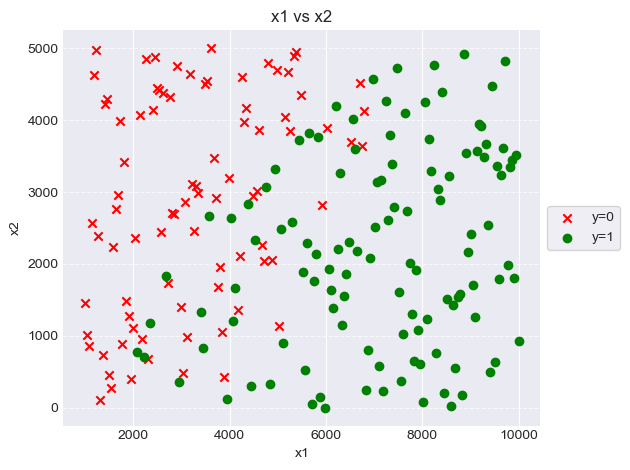

In [27]:
plt.scatter(X_bc[y_bc.flatten() == 0, 0], X_bc[y_bc.flatten() == 0, 1], color="red", label="y=0", marker="x")
plt.scatter(X_bc[y_bc.flatten() == 1, 0], X_bc[y_bc.flatten() == 1, 1], color="green", label="y=1", marker="o")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("x1 vs x2")
plt.legend(loc="center left", frameon=True, bbox_to_anchor=(1, 0.5))
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

#### Split and prepare the dataset

In [28]:
X_bc_train, X_, y_bc_train, y_ = train_test_split(X_bc, y_bc, test_size=0.4, random_state=1)

X_bc_cv, X_bc_test, y_bc_cv, y_bc_test = train_test_split(X_, y_, test_size=0.5, random_state=1)

del X_, y_

print(f"the shape of the training set (input) is: {X_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


#### Scale the features

In [29]:
scaler_linear = StandardScaler()

X_bc_train_scaled = scaler_linear.fit_transform(X_bc_train)
X_bc_cv_scaled = scaler_linear.transform(X_bc_cv)
X_bc_test_scaled = scaler_linear.transform(X_bc_test)

#### Build and train the model

In [30]:
nn_train_error = []
nn_cv_error = []

models_bc = build_models()

for model in models_bc:
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    )

    print(f"Training {model.name}...")

    model.fit(
        X_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )

    print("Done!\n")

    threshold = 0.5

    yhat = model.predict(X_bc_train_scaled)
    yhat = tf.nn.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    yhat = model.predict(X_bc_cv_scaled)
    yhat = tf.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )


Training Model_1...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training Model_2...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training Model_3...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Model 1: Training Set Classification Error: 0.05833, CV Set Classification Error: 0.17500
Model 2: Training Set Classification Error: 0.04167, CV Set Classification Error: 0.17500
Model 3: Training Set Classification Error: 0.05833, CV Set Classification Error: 0.12500


#### Select the model with the lowest CV Error

In [31]:
best_model_index = np.argmin(nn_cv_error)

yhat = models_bc[best_model_index].predict(X_bc_test_scaled)
yhat = tf.nn.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {best_model_index}")
print(f"Training Set Classification Error: {nn_train_error[best_model_index]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[best_model_index]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Selected Model: 2
Training Set Classification Error: 0.0583
CV Set Classification Error: 0.1250
Test Set Classification Error: 0.2000
